In [1]:
!pip install -q tensorflow==2.0.0-beta1

tensorflow-serving-api 1.14.0 has requirement tensorflow~=1.14.0, but you'll have tensorflow 2.0.0b1 which is incompatible.
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
!pip install -q statsmodels==0.9.0

tensorflow-serving-api 1.14.0 has requirement tensorflow~=1.14.0, but you'll have tensorflow 2.0.0b1 which is incompatible.
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
!pip install -q scipy==1.2

tensorflow-serving-api 1.14.0 has requirement tensorflow~=1.14.0, but you'll have tensorflow 2.0.0b1 which is incompatible.
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
!pip install -q pyramid.arima

tensorflow-serving-api 1.14.0 has requirement tensorflow~=1.14.0, but you'll have tensorflow 2.0.0b1 which is incompatible.
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [5]:
import os
import csv
import random
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import MinMaxScaler

dtypes = {
        'IsCanceled':                                    'float64',
        'LeadTime':                                          'float64',
        'StaysInWeekendNights':                                     'float64',
        'StaysInWeekNights':                                     'float64',
        'Adults':                            'float64',
        'Children':                            'float64',
        'Babies':                                  'float64',
        'Meal':                                    'category',
        'Country':                                               'category',
        'MarketSegment':                                    'category',
        'DistributionChannel':                                       'category',
        'IsRepeatedGuest':                               'float64',
        'PreviousCancellations':                                    'float64',
        'PreviousBookingsNotCanceled':                          'float64',
        'ReservedRoomType':                                             'category',
        'AssignedRoomType':                                            'category',
        'BookingChanges':                                                'float64',
        'DepositType':                                              'category',
        'Agent':                                              'category',
        'Company':                                 'category',
        'DaysInWaitingList':                                           'float64',
        'CustomerType':                                           'category',
        'ADR':                                          'float64',
        'RequiredCarParkingSpaces':                                      'float64',
        'TotalOfSpecialRequests':                                              'float64',
        'ReservationStatus':                                                'category'
        }

In [6]:
import boto3 
import botocore 
import pandas as pd 
from sagemaker import get_execution_role 

role = get_execution_role() 

bucket = 'hoteldatabucket' 
data_key = 'H2full.csv'
data_location = 's3://{}/{}'.format(bucket, data_key) 

train_df = pd.read_csv(data_location, dtype=dtypes, converters={'ArrivalDateWeekNumber': '{:0>2}'.format})

In [7]:
a=train_df.head()
b=train_df
b
c=b.sort_values(['ArrivalDateYear','ArrivalDateWeekNumber'], ascending=True)
c=pd.DataFrame(c)
c
type(c)

pandas.core.frame.DataFrame

In [8]:
from pandas import DataFrame  

df = DataFrame(c, columns= ['ArrivalDateYear', 'ArrivalDateWeekNumber']) 
df

,ArrivalDateYear,ArrivalDateWeekNumber
0,2015,27
1,2015,27
2,2015,27
3,2015,27
4,2015,27
5,2015,27
6,2015,27
7,2015,27
8,2015,27
9,2015,27


In [9]:
# https://datatofish.com/concatenate-values-python/

df1 = df['ArrivalDateYear'].map(str) + df['ArrivalDateWeekNumber'].map(str)
print (df1)
df1=pd.DataFrame(df1)

0        201527
1        201527
2        201527
3        201527
4        201527
5        201527
6        201527
7        201527
8        201527
9        201527
10       201527
11       201527
12       201527
13       201527
14       201527
15       201527
16       201527
17       201527
18       201527
19       201527
20       201527
21       201527
22       201527
23       201527
24       201527
25       201527
26       201527
27       201527
28       201527
29       201527
          ...  
79299    201735
79300    201735
79301    201735
79302    201735
79303    201735
79304    201735
79305    201735
79306    201735
79307    201735
79308    201735
79310    201735
79311    201735
79312    201735
79313    201735
79314    201735
79315    201735
79316    201735
79317    201735
79318    201735
79319    201735
79320    201735
79321    201735
79322    201735
79323    201735
79324    201735
79325    201735
79326    201735
79327    201735
79328    201735
79329    201735
Length: 79330, dtype: ob

In [10]:
df2 = DataFrame(c, columns= ['IsCanceled']) 
df2

,IsCanceled
0,0.0
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,0.0
7,1.0
8,1.0
9,1.0


In [11]:
type(df1)

pandas.core.frame.DataFrame

In [12]:
df3=pd.concat([df1, df2], axis = 1)
df3
df3.columns = ['FullDate', 'IsCanceled']

In [13]:
df3
df3.sort_values(['FullDate','IsCanceled'], ascending=True)

,FullDate,IsCanceled
0,201527,0.0
6,201527,0.0
10,201527,0.0
11,201527,0.0
12,201527,0.0
13,201527,0.0
15,201527,0.0
17,201527,0.0
18,201527,0.0
22,201527,0.0


In [14]:
df4 = df3.groupby('FullDate').agg(sum)
df4
df4.sort_values(['FullDate'], ascending=True)

,IsCanceled
FullDate,
201527,97.0
201528,153.0
201529,228.0
201530,321.0
201531,159.0
201532,308.0
201533,428.0
201534,191.0
201535,212.0


In [15]:
tseries=df4['IsCanceled']
tseries

FullDate
201527     97.0
201528    153.0
201529    228.0
201530    321.0
201531    159.0
201532    308.0
201533    428.0
201534    191.0
201535    212.0
201536    266.0
201537    331.0
201538    429.0
201539    414.0
201540    324.0
201541    391.0
201542    434.0
201543    150.0
201544    199.0
201545     67.0
201546     81.0
201547     41.0
201548    103.0
201549    169.0
201550    263.0
201551     21.0
201552     43.0
201553    181.0
201601     40.0
201602     35.0
201603     65.0
          ...  
201706    148.0
201707    295.0
201708    277.0
201709    301.0
201710    229.0
201711    353.0
201712    283.0
201713    226.0
201714    432.0
201715    447.0
201716    417.0
201717    568.0
201718    532.0
201719    385.0
201720    666.0
201721    407.0
201722    463.0
201723    456.0
201724    407.0
201725    374.0
201726    391.0
201727    298.0
201728    351.0
201729    222.0
201730    351.0
201731    253.0
201732    269.0
201733    341.0
201734    201.0
201735    129.0
Name: IsCancele

In [16]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(tseries)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.076840
p-value: 0.028315
Critical Values:
	1%: -3.495
	5%: -2.890
	10%: -2.582


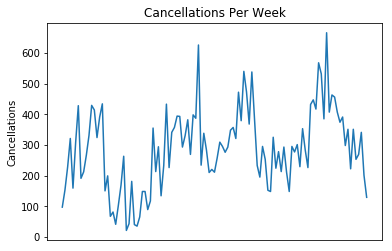

In [17]:
import matplotlib.pyplot as plt
plt.plot(tseries)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.ylabel('Cancellations')
plt.title("Cancellations Per Week")
plt.show()

In [18]:
df=pd.DataFrame(tseries)
df

,IsCanceled
FullDate,
201527,97.0
201528,153.0
201529,228.0
201530,321.0
201531,159.0
201532,308.0
201533,428.0
201534,191.0
201535,212.0


In [19]:
df = df[:100]

In [20]:
df

,IsCanceled
FullDate,
201527,97.0
201528,153.0
201529,228.0
201530,321.0
201531,159.0
201532,308.0
201533,428.0
201534,191.0
201535,212.0


In [21]:
# Form dataset matrix
def create_dataset(df, previous=1):
    dataX, dataY = [], []
    for i in range(len(df)-previous-1):
        a = df[i:(i+previous), 0]
        dataX.append(a)
        dataY.append(df[i + previous, 0])
    return np.array(dataX), np.array(dataY)

In [22]:
df=np.array(df)

In [23]:
df

array([[ 97.],
       [153.],
       [228.],
       [321.],
       [159.],
       [308.],
       [428.],
       [191.],
       [212.],
       [266.],
       [331.],
       [429.],
       [414.],
       [324.],
       [391.],
       [434.],
       [150.],
       [199.],
       [ 67.],
       [ 81.],
       [ 41.],
       [103.],
       [169.],
       [263.],
       [ 21.],
       [ 43.],
       [181.],
       [ 40.],
       [ 35.],
       [ 65.],
       [148.],
       [148.],
       [ 89.],
       [117.],
       [355.],
       [213.],
       [294.],
       [134.],
       [233.],
       [433.],
       [226.],
       [341.],
       [357.],
       [394.],
       [393.],
       [293.],
       [330.],
       [382.],
       [269.],
       [398.],
       [387.],
       [626.],
       [234.],
       [338.],
       [283.],
       [210.],
       [220.],
       [211.],
       [257.],
       [309.],
       [295.],
       [276.],
       [293.],
       [348.],
       [357.],
       [321.],
       [47

In [24]:
# normalize dataset with MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(df)
df

array([[0.11782946],
       [0.20465116],
       [0.32093023],
       [0.46511628],
       [0.21395349],
       [0.44496124],
       [0.63100775],
       [0.26356589],
       [0.29612403],
       [0.37984496],
       [0.48062016],
       [0.63255814],
       [0.60930233],
       [0.46976744],
       [0.57364341],
       [0.64031008],
       [0.2       ],
       [0.27596899],
       [0.07131783],
       [0.09302326],
       [0.03100775],
       [0.12713178],
       [0.22945736],
       [0.3751938 ],
       [0.        ],
       [0.03410853],
       [0.24806202],
       [0.02945736],
       [0.02170543],
       [0.06821705],
       [0.19689922],
       [0.19689922],
       [0.10542636],
       [0.14883721],
       [0.51782946],
       [0.29767442],
       [0.42325581],
       [0.1751938 ],
       [0.32868217],
       [0.63875969],
       [0.31782946],
       [0.49612403],
       [0.52093023],
       [0.57829457],
       [0.57674419],
       [0.42170543],
       [0.47906977],
       [0.559

In [25]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

# Training and Validation data partition
train_size = int(len(df) * 0.8)
val_size = len(df) - train_size
train, val = df[0:train_size,:], df[train_size:len(df),:]

# Number of previous
previous = 5
X_train, Y_train = create_dataset(train, previous)
X_val, Y_val = create_dataset(val, previous)

In [26]:
X_train

array([[0.11782946, 0.20465116, 0.32093023, 0.46511628, 0.21395349],
       [0.20465116, 0.32093023, 0.46511628, 0.21395349, 0.44496124],
       [0.32093023, 0.46511628, 0.21395349, 0.44496124, 0.63100775],
       [0.46511628, 0.21395349, 0.44496124, 0.63100775, 0.26356589],
       [0.21395349, 0.44496124, 0.63100775, 0.26356589, 0.29612403],
       [0.44496124, 0.63100775, 0.26356589, 0.29612403, 0.37984496],
       [0.63100775, 0.26356589, 0.29612403, 0.37984496, 0.48062016],
       [0.26356589, 0.29612403, 0.37984496, 0.48062016, 0.63255814],
       [0.29612403, 0.37984496, 0.48062016, 0.63255814, 0.60930233],
       [0.37984496, 0.48062016, 0.63255814, 0.60930233, 0.46976744],
       [0.48062016, 0.63255814, 0.60930233, 0.46976744, 0.57364341],
       [0.63255814, 0.60930233, 0.46976744, 0.57364341, 0.64031008],
       [0.60930233, 0.46976744, 0.57364341, 0.64031008, 0.2       ],
       [0.46976744, 0.57364341, 0.64031008, 0.2       , 0.27596899],
       [0.57364341, 0.64031008, 0.

In [27]:
Y_train

array([0.44496124, 0.63100775, 0.26356589, 0.29612403, 0.37984496,
       0.48062016, 0.63255814, 0.60930233, 0.46976744, 0.57364341,
       0.64031008, 0.2       , 0.27596899, 0.07131783, 0.09302326,
       0.03100775, 0.12713178, 0.22945736, 0.3751938 , 0.        ,
       0.03410853, 0.24806202, 0.02945736, 0.02170543, 0.06821705,
       0.19689922, 0.19689922, 0.10542636, 0.14883721, 0.51782946,
       0.29767442, 0.42325581, 0.1751938 , 0.32868217, 0.63875969,
       0.31782946, 0.49612403, 0.52093023, 0.57829457, 0.57674419,
       0.42170543, 0.47906977, 0.55968992, 0.38449612, 0.58449612,
       0.56744186, 0.9379845 , 0.33023256, 0.49147287, 0.40620155,
       0.29302326, 0.30852713, 0.29457364, 0.36589147, 0.44651163,
       0.4248062 , 0.39534884, 0.42170543, 0.50697674, 0.52093023,
       0.46511628, 0.69922481, 0.55503876, 0.80465116, 0.70077519,
       0.5379845 , 0.80155039, 0.5627907 , 0.32868217, 0.26976744,
       0.4248062 , 0.35968992, 0.20310078, 0.19689922])

Train on 59 samples, validate on 15 samples
Epoch 1/1000
59/59 - 3s - loss: 0.1458 - val_loss: 0.2071
Epoch 2/1000
59/59 - 0s - loss: 0.1257 - val_loss: 0.1548
Epoch 3/1000
59/59 - 0s - loss: 0.1011 - val_loss: 0.1242
Epoch 4/1000
59/59 - 0s - loss: 0.0912 - val_loss: 0.0969
Epoch 5/1000
59/59 - 0s - loss: 0.0652 - val_loss: 0.0848
Epoch 6/1000
59/59 - 0s - loss: 0.0617 - val_loss: 0.0741
Epoch 7/1000
59/59 - 0s - loss: 0.0500 - val_loss: 0.0695
Epoch 8/1000
59/59 - 0s - loss: 0.0576 - val_loss: 0.0655
Epoch 9/1000
59/59 - 0s - loss: 0.0491 - val_loss: 0.0630
Epoch 10/1000
59/59 - 0s - loss: 0.0453 - val_loss: 0.0610
Epoch 11/1000
59/59 - 0s - loss: 0.0479 - val_loss: 0.0582
Epoch 12/1000
59/59 - 0s - loss: 0.0448 - val_loss: 0.0554
Epoch 13/1000
59/59 - 0s - loss: 0.0509 - val_loss: 0.0574
Epoch 14/1000
59/59 - 0s - loss: 0.0377 - val_loss: 0.0542
Epoch 15/1000
59/59 - 0s - loss: 0.0393 - val_loss: 0.0540
Epoch 16/1000
59/59 - 0s - loss: 0.0489 - val_loss: 0.0554
Epoch 17/1000
59/59 -

59/59 - 0s - loss: 0.0314 - val_loss: 0.0395
Epoch 111/1000
59/59 - 0s - loss: 0.0312 - val_loss: 0.0384
Epoch 112/1000
59/59 - 0s - loss: 0.0337 - val_loss: 0.0384
Epoch 113/1000
59/59 - 0s - loss: 0.0346 - val_loss: 0.0390
Epoch 114/1000
59/59 - 0s - loss: 0.0317 - val_loss: 0.0383
Epoch 115/1000
59/59 - 0s - loss: 0.0302 - val_loss: 0.0384
Epoch 116/1000
59/59 - 0s - loss: 0.0351 - val_loss: 0.0405
Epoch 117/1000
59/59 - 0s - loss: 0.0355 - val_loss: 0.0401
Epoch 118/1000
59/59 - 0s - loss: 0.0292 - val_loss: 0.0380
Epoch 119/1000
59/59 - 0s - loss: 0.0400 - val_loss: 0.0393
Epoch 120/1000
59/59 - 0s - loss: 0.0390 - val_loss: 0.0425
Epoch 121/1000
59/59 - 0s - loss: 0.0325 - val_loss: 0.0399
Epoch 122/1000
59/59 - 0s - loss: 0.0327 - val_loss: 0.0392
Epoch 123/1000
59/59 - 0s - loss: 0.0309 - val_loss: 0.0401
Epoch 124/1000
59/59 - 0s - loss: 0.0283 - val_loss: 0.0409
Epoch 125/1000
59/59 - 0s - loss: 0.0319 - val_loss: 0.0401
Epoch 126/1000
59/59 - 0s - loss: 0.0351 - val_loss: 0.

Epoch 247/1000
59/59 - 0s - loss: 0.0352 - val_loss: 0.0381
Epoch 248/1000
59/59 - 0s - loss: 0.0307 - val_loss: 0.0379
Epoch 249/1000
59/59 - 0s - loss: 0.0310 - val_loss: 0.0381
Epoch 250/1000
59/59 - 0s - loss: 0.0283 - val_loss: 0.0375
Epoch 251/1000
59/59 - 0s - loss: 0.0324 - val_loss: 0.0379
Epoch 252/1000
59/59 - 0s - loss: 0.0295 - val_loss: 0.0365
Epoch 253/1000
59/59 - 0s - loss: 0.0313 - val_loss: 0.0374
Epoch 254/1000
59/59 - 0s - loss: 0.0363 - val_loss: 0.0371
Epoch 255/1000
59/59 - 0s - loss: 0.0307 - val_loss: 0.0370
Epoch 256/1000
59/59 - 0s - loss: 0.0335 - val_loss: 0.0369
Epoch 257/1000
59/59 - 0s - loss: 0.0346 - val_loss: 0.0362
Epoch 258/1000
59/59 - 0s - loss: 0.0318 - val_loss: 0.0371
Epoch 259/1000
59/59 - 0s - loss: 0.0285 - val_loss: 0.0360
Epoch 260/1000
59/59 - 0s - loss: 0.0348 - val_loss: 0.0372
Epoch 261/1000
59/59 - 0s - loss: 0.0333 - val_loss: 0.0390
Epoch 262/1000
59/59 - 0s - loss: 0.0317 - val_loss: 0.0382
Epoch 263/1000
59/59 - 0s - loss: 0.0390

Epoch 384/1000
59/59 - 0s - loss: 0.0299 - val_loss: 0.0369
Epoch 385/1000
59/59 - 0s - loss: 0.0292 - val_loss: 0.0354
Epoch 386/1000
59/59 - 0s - loss: 0.0279 - val_loss: 0.0360
Epoch 387/1000
59/59 - 0s - loss: 0.0339 - val_loss: 0.0361
Epoch 388/1000
59/59 - 0s - loss: 0.0329 - val_loss: 0.0371
Epoch 389/1000
59/59 - 0s - loss: 0.0340 - val_loss: 0.0372
Epoch 390/1000
59/59 - 0s - loss: 0.0290 - val_loss: 0.0368
Epoch 391/1000
59/59 - 0s - loss: 0.0322 - val_loss: 0.0367
Epoch 392/1000
59/59 - 0s - loss: 0.0297 - val_loss: 0.0357
Epoch 393/1000
59/59 - 0s - loss: 0.0341 - val_loss: 0.0371
Epoch 394/1000
59/59 - 0s - loss: 0.0291 - val_loss: 0.0358
Epoch 395/1000
59/59 - 0s - loss: 0.0314 - val_loss: 0.0363
Epoch 396/1000
59/59 - 0s - loss: 0.0341 - val_loss: 0.0368
Epoch 397/1000
59/59 - 0s - loss: 0.0301 - val_loss: 0.0367
Epoch 398/1000
59/59 - 0s - loss: 0.0313 - val_loss: 0.0373
Epoch 399/1000
59/59 - 0s - loss: 0.0308 - val_loss: 0.0379
Epoch 400/1000
59/59 - 0s - loss: 0.0325

Epoch 521/1000
59/59 - 0s - loss: 0.0286 - val_loss: 0.0378
Epoch 522/1000
59/59 - 0s - loss: 0.0288 - val_loss: 0.0369
Epoch 523/1000
59/59 - 0s - loss: 0.0343 - val_loss: 0.0370
Epoch 524/1000
59/59 - 0s - loss: 0.0327 - val_loss: 0.0385
Epoch 525/1000
59/59 - 0s - loss: 0.0341 - val_loss: 0.0386
Epoch 526/1000
59/59 - 0s - loss: 0.0357 - val_loss: 0.0386
Epoch 527/1000
59/59 - 0s - loss: 0.0340 - val_loss: 0.0397
Epoch 528/1000
59/59 - 0s - loss: 0.0314 - val_loss: 0.0400
Epoch 529/1000
59/59 - 0s - loss: 0.0298 - val_loss: 0.0379
Epoch 530/1000
59/59 - 0s - loss: 0.0304 - val_loss: 0.0383
Epoch 531/1000
59/59 - 0s - loss: 0.0363 - val_loss: 0.0393
Epoch 532/1000
59/59 - 0s - loss: 0.0309 - val_loss: 0.0394
Epoch 533/1000
59/59 - 0s - loss: 0.0316 - val_loss: 0.0390
Epoch 534/1000
59/59 - 0s - loss: 0.0308 - val_loss: 0.0377
Epoch 535/1000
59/59 - 0s - loss: 0.0354 - val_loss: 0.0389
Epoch 536/1000
59/59 - 0s - loss: 0.0305 - val_loss: 0.0378
Epoch 537/1000
59/59 - 0s - loss: 0.0304

Epoch 658/1000
59/59 - 0s - loss: 0.0323 - val_loss: 0.0382
Epoch 659/1000
59/59 - 0s - loss: 0.0327 - val_loss: 0.0385
Epoch 660/1000
59/59 - 0s - loss: 0.0374 - val_loss: 0.0385
Epoch 661/1000
59/59 - 0s - loss: 0.0285 - val_loss: 0.0377
Epoch 662/1000
59/59 - 0s - loss: 0.0291 - val_loss: 0.0374
Epoch 663/1000
59/59 - 0s - loss: 0.0344 - val_loss: 0.0375
Epoch 664/1000
59/59 - 0s - loss: 0.0316 - val_loss: 0.0371
Epoch 665/1000
59/59 - 0s - loss: 0.0306 - val_loss: 0.0395
Epoch 666/1000
59/59 - 0s - loss: 0.0306 - val_loss: 0.0386
Epoch 667/1000
59/59 - 0s - loss: 0.0305 - val_loss: 0.0392
Epoch 668/1000
59/59 - 0s - loss: 0.0310 - val_loss: 0.0396
Epoch 669/1000
59/59 - 0s - loss: 0.0288 - val_loss: 0.0383
Epoch 670/1000
59/59 - 0s - loss: 0.0349 - val_loss: 0.0391
Epoch 671/1000
59/59 - 0s - loss: 0.0292 - val_loss: 0.0381
Epoch 672/1000
59/59 - 0s - loss: 0.0257 - val_loss: 0.0374
Epoch 673/1000
59/59 - 0s - loss: 0.0330 - val_loss: 0.0381
Epoch 674/1000
59/59 - 0s - loss: 0.0343

Epoch 795/1000
59/59 - 0s - loss: 0.0324 - val_loss: 0.0360
Epoch 796/1000
59/59 - 0s - loss: 0.0275 - val_loss: 0.0368
Epoch 797/1000
59/59 - 0s - loss: 0.0348 - val_loss: 0.0387
Epoch 798/1000
59/59 - 0s - loss: 0.0362 - val_loss: 0.0393
Epoch 799/1000
59/59 - 0s - loss: 0.0324 - val_loss: 0.0381
Epoch 800/1000
59/59 - 0s - loss: 0.0327 - val_loss: 0.0383
Epoch 801/1000
59/59 - 0s - loss: 0.0254 - val_loss: 0.0372
Epoch 802/1000
59/59 - 0s - loss: 0.0281 - val_loss: 0.0372
Epoch 803/1000
59/59 - 0s - loss: 0.0309 - val_loss: 0.0364
Epoch 804/1000
59/59 - 0s - loss: 0.0314 - val_loss: 0.0360
Epoch 805/1000
59/59 - 0s - loss: 0.0308 - val_loss: 0.0366
Epoch 806/1000
59/59 - 0s - loss: 0.0295 - val_loss: 0.0371
Epoch 807/1000
59/59 - 0s - loss: 0.0312 - val_loss: 0.0383
Epoch 808/1000
59/59 - 0s - loss: 0.0334 - val_loss: 0.0377
Epoch 809/1000
59/59 - 0s - loss: 0.0304 - val_loss: 0.0360
Epoch 810/1000
59/59 - 0s - loss: 0.0320 - val_loss: 0.0368
Epoch 811/1000
59/59 - 0s - loss: 0.0332

Epoch 932/1000
59/59 - 0s - loss: 0.0316 - val_loss: 0.0392
Epoch 933/1000
59/59 - 0s - loss: 0.0327 - val_loss: 0.0392
Epoch 934/1000
59/59 - 0s - loss: 0.0299 - val_loss: 0.0377
Epoch 935/1000
59/59 - 0s - loss: 0.0277 - val_loss: 0.0373
Epoch 936/1000
59/59 - 0s - loss: 0.0286 - val_loss: 0.0369
Epoch 937/1000
59/59 - 0s - loss: 0.0311 - val_loss: 0.0373
Epoch 938/1000
59/59 - 0s - loss: 0.0316 - val_loss: 0.0378
Epoch 939/1000
59/59 - 0s - loss: 0.0308 - val_loss: 0.0376
Epoch 940/1000
59/59 - 0s - loss: 0.0311 - val_loss: 0.0385
Epoch 941/1000
59/59 - 0s - loss: 0.0316 - val_loss: 0.0383
Epoch 942/1000
59/59 - 0s - loss: 0.0294 - val_loss: 0.0385
Epoch 943/1000
59/59 - 0s - loss: 0.0302 - val_loss: 0.0382
Epoch 944/1000
59/59 - 0s - loss: 0.0357 - val_loss: 0.0379
Epoch 945/1000
59/59 - 0s - loss: 0.0309 - val_loss: 0.0380
Epoch 946/1000
59/59 - 0s - loss: 0.0305 - val_loss: 0.0378
Epoch 947/1000
59/59 - 0s - loss: 0.0311 - val_loss: 0.0369
Epoch 948/1000
59/59 - 0s - loss: 0.0248

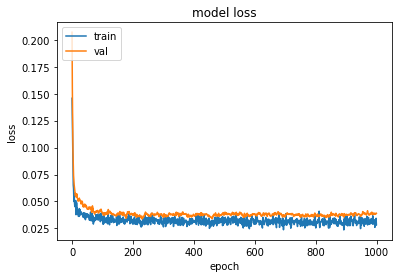

In [28]:
from tensorflow.keras.layers import Dropout

# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_val = np.reshape(X_val, (X_val.shape[0], 1, X_val.shape[1]))

# Generate LSTM network
model = tf.keras.Sequential()
model.add(LSTM(4, input_shape=(1, previous)))
model.add(Dropout(0.8))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history=model.fit(X_train, Y_train, validation_split=0.2, epochs=1000, batch_size=1, verbose=2)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [29]:
# Generate predictions
trainpred = model.predict(X_train)
valpred = model.predict(X_val)

In [30]:
trainpred

array([[0.3476543 ],
       [0.38553306],
       [0.40653336],
       [0.3755109 ],
       [0.37641355],
       [0.367223  ],
       [0.38613585],
       [0.41502374],
       [0.42662647],
       [0.41918504],
       [0.41628343],
       [0.42352024],
       [0.36796212],
       [0.36340418],
       [0.26140136],
       [0.25235754],
       [0.22122136],
       [0.24783033],
       [0.28595808],
       [0.34103286],
       [0.25456077],
       [0.26440954],
       [0.2874092 ],
       [0.20166013],
       [0.2412558 ],
       [0.23134945],
       [0.26279306],
       [0.28427884],
       [0.27583218],
       [0.28799725],
       [0.36210364],
       [0.3491702 ],
       [0.39067808],
       [0.33726394],
       [0.3550707 ],
       [0.39693305],
       [0.37979698],
       [0.40468982],
       [0.40652454],
       [0.41654068],
       [0.4223135 ],
       [0.4093517 ],
       [0.4051319 ],
       [0.41121745],
       [0.39693263],
       [0.41122636],
       [0.41807258],
       [0.424

In [31]:
valpred

array([[0.36108527],
       [0.3333608 ],
       [0.3705305 ],
       [0.37016183],
       [0.39157635],
       [0.3787943 ],
       [0.3973607 ],
       [0.39103052],
       [0.3774385 ],
       [0.40674007],
       [0.42480618],
       [0.43052435],
       [0.4258905 ],
       [0.4403058 ]], dtype=float32)

In [32]:
# Convert predictions back to normal values
trainpred = scaler.inverse_transform(trainpred)
Y_train = scaler.inverse_transform([Y_train])
valpred = scaler.inverse_transform(valpred)
Y_val = scaler.inverse_transform([Y_val])
predictions = valpred

In [33]:
import math
from sklearn.metrics import mean_squared_error

# calculate RMSE
trainScore = math.sqrt(mean_squared_error(Y_train[0], trainpred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
valScore = math.sqrt(mean_squared_error(Y_val[0], valpred[:,0]))
print('Validation Score: %.2f RMSE' % (valScore))

Train Score: 109.83 RMSE
Validation Score: 129.04 RMSE


In [34]:
# Train predictions
trainpredPlot = np.empty_like(df)
trainpredPlot[:, :] = np.nan
trainpredPlot[previous:len(trainpred)+previous, :] = trainpred

In [35]:
# Validation predictions
valpredPlot = np.empty_like(df)
valpredPlot[:, :] = np.nan
valpredPlot[len(trainpred)+(previous*2)+1:len(df)-1, :] = valpred

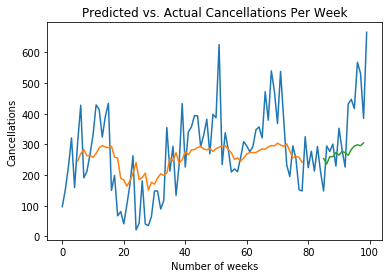

In [36]:
# Plot all predictions
inversetransform, =plt.plot(scaler.inverse_transform(df))
trainpred, =plt.plot(trainpredPlot)
valpred, =plt.plot(valpredPlot)
plt.xlabel('Number of weeks')
plt.ylabel('Cancellations')
plt.title("Predicted vs. Actual Cancellations Per Week")
plt.show()

In [37]:
Y_val=Y_val.reshape(-1)
Y_val.shape
Y_val=pd.Series(Y_val)

In [38]:
Y_val

0     148.0
1     295.0
2     277.0
3     301.0
4     229.0
5     353.0
6     283.0
7     226.0
8     432.0
9     447.0
10    417.0
11    568.0
12    532.0
13    385.0
dtype: float64

In [39]:
predictions=predictions.reshape(-1)
predictions.shape
predictions=pd.Series(predictions)

In [40]:
predictions

0     253.899994
1     236.017715
2     259.992157
3     259.754395
4     273.566742
5     265.322327
6     277.297668
7     273.214691
8     264.447815
9     283.347351
10    295.000000
11    298.688202
12    295.699371
13    304.997253
dtype: float32

In [41]:
import numpy as np

def mda(actual: np.ndarray, predicted: np.ndarray):
    """ Mean Directional Accuracy """
    return np.mean((np.sign(actual[1:] - actual[:-1]) == np.sign(predicted[1:] - predicted[:-1])).astype(int))

In [42]:
mda(Y_val, predictions)

0.8571428571428571

In [43]:
# https://machinelearningmastery.com/time-series-forecasting-performance-measures-with-python/

from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(Y_val, predictions)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 129.042267


In [44]:
forecast_error = (predictions-Y_val)
forecast_error

0     105.899994
1     -58.982285
2     -17.007843
3     -41.245605
4      44.566742
5     -87.677673
6      -5.702332
7      47.214691
8    -167.552185
9    -163.652649
10   -122.000000
11   -269.311798
12   -236.300629
13    -80.002747
dtype: float64

In [45]:
mean_forecast_error = np.mean(forecast_error)
mean_forecast_error

-75.12530844552177

In [46]:
X_train

array([[[0.11782946, 0.20465116, 0.32093023, 0.46511628, 0.21395349]],

       [[0.20465116, 0.32093023, 0.46511628, 0.21395349, 0.44496124]],

       [[0.32093023, 0.46511628, 0.21395349, 0.44496124, 0.63100775]],

       [[0.46511628, 0.21395349, 0.44496124, 0.63100775, 0.26356589]],

       [[0.21395349, 0.44496124, 0.63100775, 0.26356589, 0.29612403]],

       [[0.44496124, 0.63100775, 0.26356589, 0.29612403, 0.37984496]],

       [[0.63100775, 0.26356589, 0.29612403, 0.37984496, 0.48062016]],

       [[0.26356589, 0.29612403, 0.37984496, 0.48062016, 0.63255814]],

       [[0.29612403, 0.37984496, 0.48062016, 0.63255814, 0.60930233]],

       [[0.37984496, 0.48062016, 0.63255814, 0.60930233, 0.46976744]],

       [[0.48062016, 0.63255814, 0.60930233, 0.46976744, 0.57364341]],

       [[0.63255814, 0.60930233, 0.46976744, 0.57364341, 0.64031008]],

       [[0.60930233, 0.46976744, 0.57364341, 0.64031008, 0.2       ]],

       [[0.46976744, 0.57364341, 0.64031008, 0.2       , 0.27596

In [47]:
# Test (unseen) predictions
# (t) and (t-5)
Xnew = np.array([[407,463,456,407,374],[463,456,407,374,391],[456,407,374,391,298],[407,374,391,298,351],[374,391,298,351,222],[391,298,351,222,351],[298,351,222,351,253],[351,222,351,253,269],[222,351,253,269,341],[351,253,269,341,201]])

In [48]:
Xnew

array([[407, 463, 456, 407, 374],
       [463, 456, 407, 374, 391],
       [456, 407, 374, 391, 298],
       [407, 374, 391, 298, 351],
       [374, 391, 298, 351, 222],
       [391, 298, 351, 222, 351],
       [298, 351, 222, 351, 253],
       [351, 222, 351, 253, 269],
       [222, 351, 253, 269, 341],
       [351, 253, 269, 341, 201]])

In [49]:
Xnew = scaler.fit_transform(Xnew)
Xnew
Xnewformat = np.reshape(Xnew, (Xnew.shape[0], 1, Xnew.shape[1]))
ynew=model.predict(Xnewformat)

In [50]:
Xnew.shape

(10, 5)

In [51]:
ynew

array([[0.43268737],
       [0.4298593 ],
       [0.43973047],
       [0.4190989 ],
       [0.32461563],
       [0.3992843 ],
       [0.35025963],
       [0.36460564],
       [0.3980084 ],
       [0.244304  ]], dtype=float32)

In [52]:
type(ynew)

numpy.ndarray

In [53]:
ynew.shape

(10, 1)

In [54]:
actual = np.array([[391,298,351,222,351,253,269,341,201,129]])

In [55]:
actual=actual.reshape(10,-1)
actual.shape

(10, 1)

In [56]:
actual

array([[391],
       [298],
       [351],
       [222],
       [351],
       [253],
       [269],
       [341],
       [201],
       [129]])

In [57]:
ynew=ynew.reshape(-1)
actual=actual.reshape(-1)
actualpd=pd.Series(actual)

In [58]:
np.min(df)

0.0

In [59]:
ynew

array([0.43268737, 0.4298593 , 0.43973047, 0.4190989 , 0.32461563,
       0.3992843 , 0.35025963, 0.36460564, 0.3980084 , 0.244304  ],
      dtype=float32)

In [60]:
maxcancel=np.max(tseries)

In [61]:
mincancel=np.min(tseries)

In [62]:
ynew = ynew * np.abs(maxcancel-mincancel) + np.min(tseries)
ynewpd=pd.Series(ynew)

In [63]:
actualpd

0    391
1    298
2    351
3    222
4    351
5    253
6    269
7    341
8    201
9    129
dtype: int64

In [64]:
ynewpd

0    300.083344
1    298.259247
2    304.626160
3    291.318787
4    230.377075
5    278.538361
6    246.917465
7    256.170654
8    277.715424
9    178.576080
dtype: float32

In [65]:
mda(actualpd, ynewpd)

0.8

In [66]:
mse = mean_squared_error(actualpd, ynewpd)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 68.154480


In [67]:
forecast_error = (ynewpd-actualpd)
forecast_error

0    -90.916656
1      0.259247
2    -46.373840
3     69.318787
4   -120.622925
5     25.538361
6    -22.082535
7    -84.829346
8     76.715424
9     49.576080
dtype: float64

In [68]:
mean_forecast_error = np.mean(forecast_error)
mean_forecast_error

-14.34174041748047

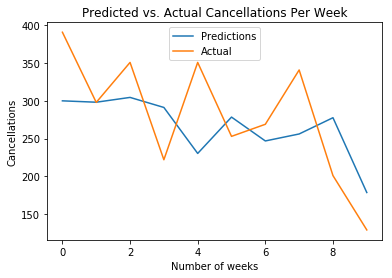

In [69]:
predictons, =plt.plot(ynewpd, label='Predictions')
actual, =plt.plot(actualpd, label='Actual')
plt.xlabel('Number of weeks')
plt.ylabel('Cancellations')
plt.title("Predicted vs. Actual Cancellations Per Week")
plt.legend(loc = 'upper center')
plt.show()